<h2 align='center' style='color:blue'>Exercise: Outlier Detection and Removal Using IQR</h2>

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/height_weight.csv')
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Histgram for weights**

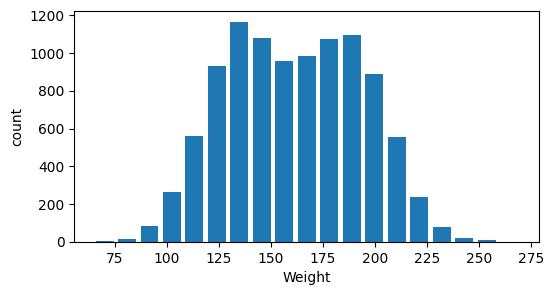

In [3]:
df['weight'].plot(kind='hist',bins=19, rwidth=0.8, figsize=(6,3))

plt.xlabel('Weight')
plt.ylabel('count')
plt.show()

**Histgram for heights**

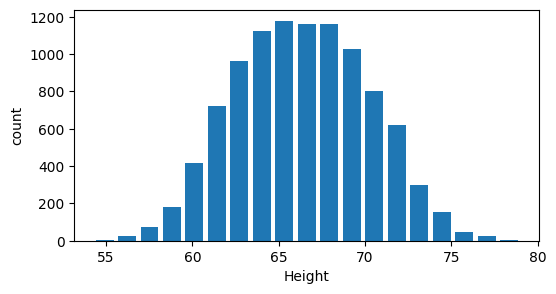

In [4]:
df['height'].plot(kind='hist',bins=19, rwidth=0.8, figsize=(6,3))

plt.xlabel('Height')
plt.ylabel('count')
plt.show()

**Detect outliers based on weight, Q1, Q3, IQR**

In [5]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

Q1, Q3

(135.8180513055015, 187.16952486868348)

### IQR

In [6]:
IQR = Q3 - Q1
print(IQR)

51.35147356318197


### Upperlimit, lowerlimit

In [7]:
weight_lowerlimit = Q1 - 1.5*IQR
weight_upperlimit = Q3 + 1.5*IQR

weight_lowerlimit, weight_upperlimit

(58.79084096072856, 264.19673521345646)

### Find the outlier records

In [8]:
outlier_for_weight = df[(df.weight<weight_lowerlimit) | (df.weight>weight_upperlimit)]
outlier_for_weight

,gender,height,weight
2014,Male,78.998742,269.989699


**Detect outliers based on height Q1, Q3**

In [9]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

Q1, Q3

(63.505620481218955, 69.1742617268347)

### IQR

In [10]:
IQR = Q3 - Q1
IQR

5.668641245615746

### Upperlimit, lowerlimit

In [11]:
height_lowerlimit = Q1 - 1.5*IQR
height_upperlimit = Q3 + 1.5*IQR

height_lowerlimit, height_upperlimit

(55.00265861279534, 77.67722359525831)

### Find the outlier records

In [12]:
outliers_for_height = df[(df.height < height_lowerlimit) | (df.height > height_upperlimit)]
outliers_for_height

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
